# SQL(MYSQL)について

**データベースを操作するための言語**

データ分析を行う場合、
pythonやRといったプログラミング言語ではなく、直接データベースから必要なデータを取り出すことも多々あります。

データサイズが大きいデータから抽出処理を行う場合、メモリ上に展開できるデータサイズしか扱うことができないことがありますが、SQLではデータベースのリソースを活用するため大きなデータサイズを利用することが可能になります。

**▽データベース**

データベースとはコンピューターを利用して膨大なデータをまとめ、管理されたデータの集まりのことです。  
例えば、データベースはTwitterのようなSNSでは顧客の個人情報や、つぶやきのデータ等もデータベースで管理されています。  

データベースには複数のテーブルがあります。  
テーブルとはいくつかの列(カラム)から構成されています。  
テーブルには異なる様々なデータが入っており、テーブルには行(レコード)と列(カラム)があります。  

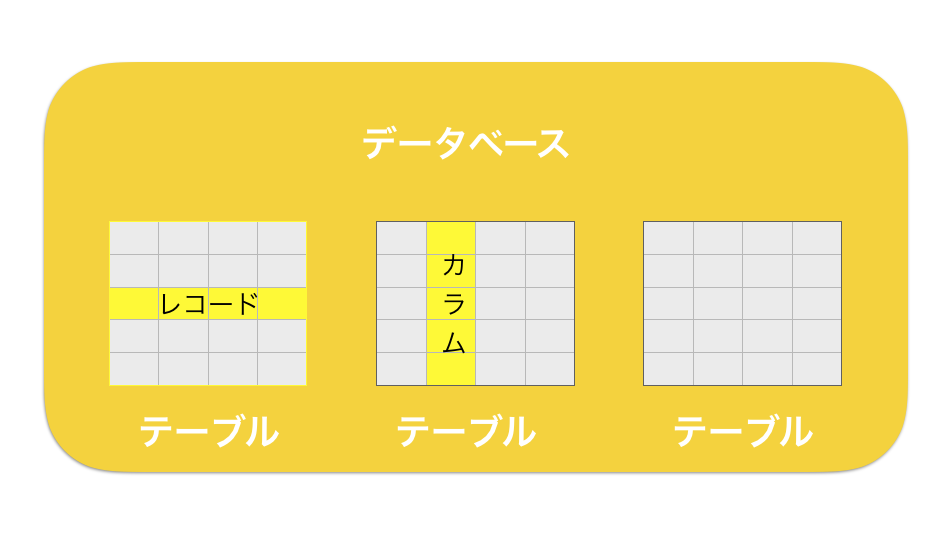

**リレーショナルデータベース(RDB/relational database)**

表の様な形式で大量のデータを高速に収納・操作できるコンピューターシステムです。  
以下の画像はデータベースの一部を切り取ったイメージ図です。
注文履歴の情報を格納したordersテーブルとユーザーの情報を格納したusersテーブルです。

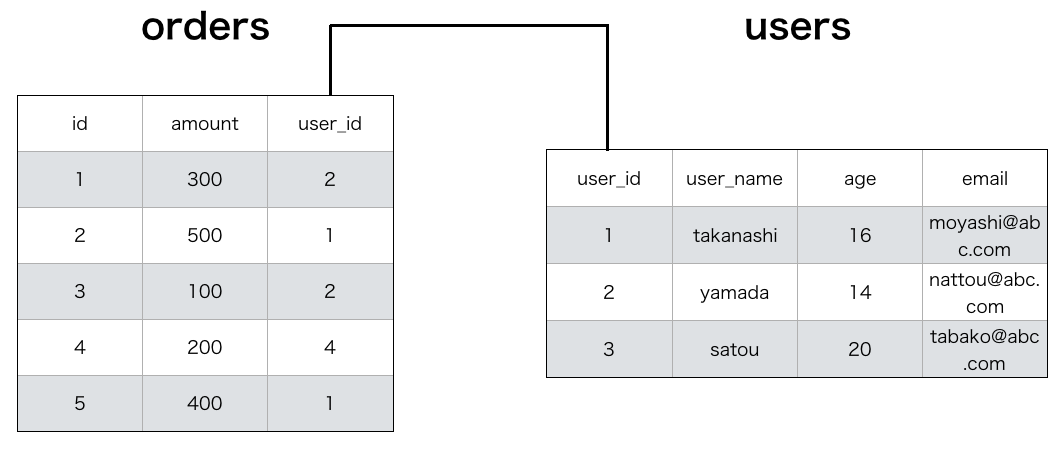

リレーショナルデータベース管理システム(RDBMS)とはRDBの構築などに必要なSQLの環境提供等の一貫した提供システムのことを指し、Oracle, MySQL、Microsoft SQL Server, PostgreSQLなどがあります。 
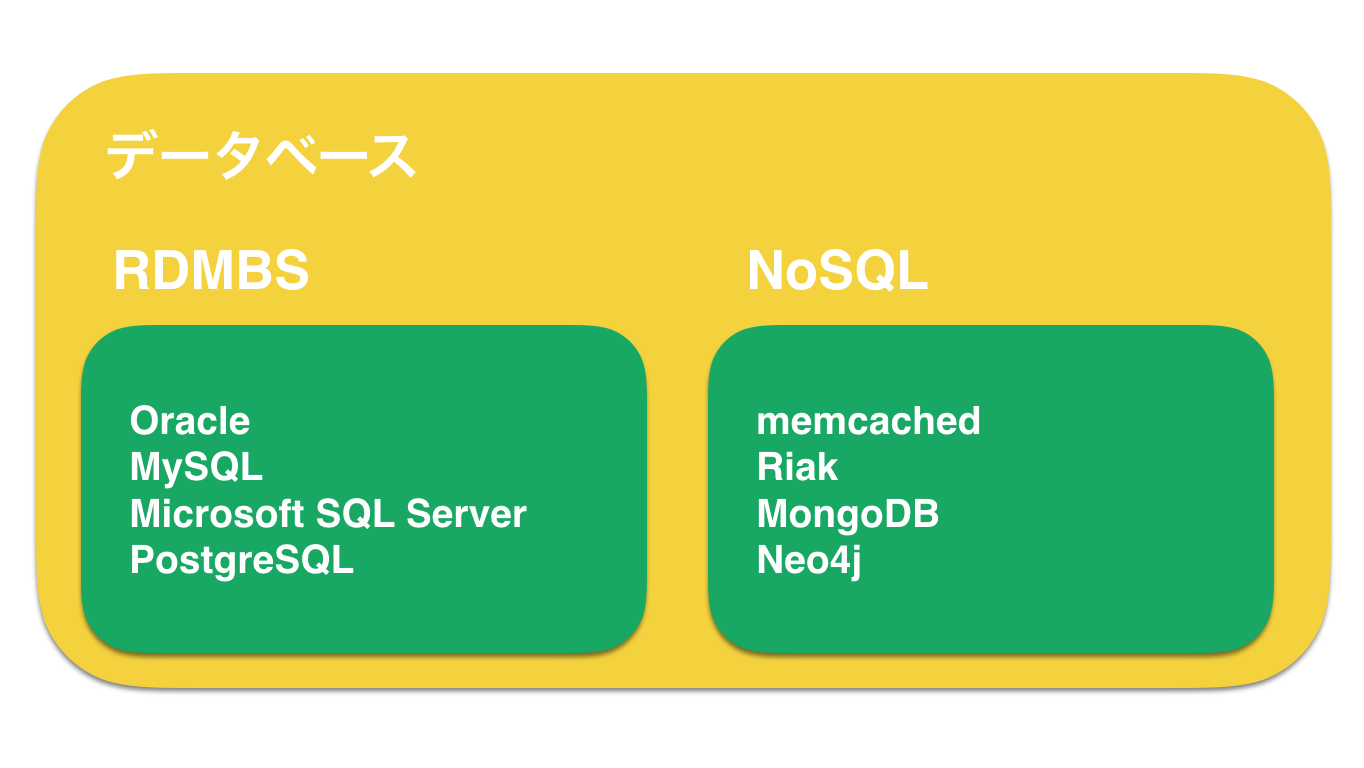

## SQLとは
SQLとは、データベースを操作するための言語です。  
データの操作や分析にも利用されています。  
また、SQL(後述するMysqlなど)と他のプログラミング言語(PythonやRubyなど)と連携することで、TwitterのようなWebサービス・アプリケーションを作ることが可能です。  

<font color="Crimson">**SQLの記述は大文字・小文字は関係ありません。
ただし、SQLを記述する際に使えるスペースは半角スペースです。**</font>

## MySQLとは

MySQL(マイエスキューエル)はリレーショナルデータベースの1つで、データベース管理システムです。  
世界的にも多く利用されており、多くのWebサービスの裏側ではMySQLが使われています。  
公式サイト  
https://www.mysql.com/jp/

# MySQL環境構築

## はじめに
<font color="Crimson">**このテキストを進める際には十分な時間を確保した上で取り掛かって下さい。**</font>  
またMac OS等のインストール完了後の設定ファイル変更により、間違った書き込み保存をしてしまうとファイルが壊れてしまい、MySQLが動作しなくなる場合がございます。  
そのため十分気をつけて変更処理を行なって下さい。  
万が一、動かなくなってしまった場合は、一度アンインストールを行い、再度インストールし直してみて下さい。  

## MySQLのインストールと起動(Mac)
1.  ターミナルを起動  
2.  Homebrewがインストールされているか確認  
 
brewというコマンドはHomebrewというMac OS用のパッケージマネージャーです。  
Homebrewを使うことで、開発ツールのインストールや削除・更新などが可能になります。  
 
まずはターミナルを起動し、下記コマンドでインストールされているか確認してください。  
brew --version  
既にインストールされていたらバージョンが表示されますが、インストールされていない場合は、次のようなメッセージが表示されます。  
-bash: brew: command not found  
その場合、Homebrewをインストールします。  
Homebrew公式サイト  
https://brew.sh/index_ja  

上記サイトにあるこのスクリプトをターミナルに貼り付け実行して下さいをターミナルで実行します。

In [ ]:
/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

上記貼り付け実行後、Enterキーを押すと、パスワードの入力を促されますのでパスワードを入力してください。  
その後、数分するとインストールが終わります。  
==> Installation successful!  
上記のようなメッセージが出ます。  
完了後、下記コマンドを実行します。

In [ ]:
brew update
brew tap homebrew/versions
brew info mysql
brew install mysql

・起動

In [ ]:
mysql.server start

実行後、次のようなメッセージが表示されたら問題ありません。  
Starting MySQL  
. SUCCESS!  
・セキュリティ周りの初期設定を行います。  
次のコマンドをターミナルで実行してください。

In [ ]:
mysql_secure_installation

yと入力後、1と入力し、MySQLにログインするための好きなパスワードを入力してください。  
パスワード入力時に、何も入力されていないような感じがしますが、入力されています。  
 
注意  
何度パスワードを実行しても下記のメッセージにて繰り返しになってしまう場合は、パウワードポリシーの制約文字数を下げてみてください。  
... Failed! Error: Your password does not satisfy the current policy requirements  
New password:  
 
ターミナルでログインしたのちに、MySQLシェルから

In [ ]:
set global validate_password.policy = "LOW";

再入力後、残り全てに対してyを入力していけば、初期設定の完了します。

In [ ]:
mysql -u root -p

上記でログインできます。  
先ほど設定したパスワードを入力してください。  
exitコマンドを実行すると、通常のターミナル画面に戻ります。  
次に、my.cnfファイルに2行を追加します。  
追加する2行は、character-set-server=utf8  
と  
default_authentication_plugin=mysql_native_password  
です。  
 
今回設定する2点ですが、日本語化設定と暗号化プラグインの設定になります。  
 
 
ファイル場所及びファイル名  
/usr/local/etc/my.cnf  

In [ ]:
# Default Homebrew MySQL server config
[mysqld]
# Only allow connections from localhost
bind-address = 127.0.0.1
character-set-server=utf8 # この行を追加
default_authentication_plugin=mysql_native_password　# この行を追加

最後にサーバーを再起動します。

In [ ]:
mysql.server restart

サーバーの状態を確認します。

In [ ]:
mysql.server status

サーバーをスタートするには、

In [ ]:
mysql.server restart

を実行します。  
もしエラーがでた場合は、一度mysqlをstopします。

In [ ]:
mysql.server stop

その後、

In [ ]:
mysql.server restart

でサーバを起動し、

In [ ]:
mysql.server status

を実行し  
SUCCESS! MySQL running (7462)  
といったメッセージが出れば無事終了です。  
※runnningの右の数字は異なります。  
もし、Permission denied ERROR! MySQL is not running, but PID file existsといったエラーが出た方は、sudoコマンドをつけて、先ほどのコマンドを再度実行してみてください。

In [ ]:
mysql.server status

もしくは、

In [ ]:
sudo mysql.server status

を実行してください。  
最後の方は、sudo実行後、Macのユーザーのパスワードが要求されますので入力してください。

## Sequel ProとWorkbenchに関して
無料かつGUIでデータベースの操作ができるアプリケーションで、Macユーザーの方はSequel Proで、Windowsユーザーの方は、Workbenchを利用できます。  
これらを使うことで、簡単に直感的にSQLを操作することが出来ますが、あくまでもGUIで操作するためのツールですので、使わないとSQLが利用できないという訳ではありません。  
GUI: グラフィカルユーザインタフェース(Graphical User Interface、GUI)は、ビジュアルであることを特徴とするユーザインタフェースのことで、グラフィックや図表がついてあり、WindowsのパソコンもGUIです。  


### Sequel Proのインストール(Mac)
Sequel ProとはMac専用の無料かつGUIでデータベースの操作ができるアプリケーションです。  
Sequel Proからインストールできます。  
今回の場合はSequerl Proはインストールしなくても問題ありません。  
Macの方でWorkbenchをご利用の場合は、Mac Workbenchをご確認ください。

# データベースの作成

## データ型
データ型とは、データの形式のことです。
MySQLではテーブル作成時に、それぞれの列(カラム)に指定した形式のデータしか入力できないように設定が可能です。
主に下記3つのデータ型があります。
 
1)   数値型 (int型、float型、double型など)  
2)   文字列型 (char型、varchar型、text型)  
  →  通常255文字までであればvarchar型を使い、255以上であればtext型を使用します。  
3)   日付・時刻型(date型、datetime型、time型)  

### 入力の注意事項　　
- 大文字、小文字は関係ない
- スペースは半角のみ使用可

### コメントに関して
ここでは1行コメントアウトと複数行のコメントアウトの方法に関して説明します。  
1行のコメントアウトは#もしくは--を使用します。  
複数行のコメントアウトは、/* コメントしたい内容 */と記載します。 


## データベースを扱う上での一連の流れ

ターミナルで、mysql -u root -p　　を入力しmysqlに接続  
パスワード入力後、mysqlにログイン。  
 
0. データベース一覧の確認 (show databases;)

1. データベースの作成 (create databases 作成するDB名;)

2. データベースの選択 (use 使用するDB名;)   
  - 使用中のDB確認(select database();)
  - 存在するテーブルの確認(show tables;)
  - DBの削除(drop database 削除するDB名;)

3. テーブルの作成 (create tabele テーブル名;) ※詳細はテーブル作成へ

4. 作成したテーブルに対してデータの追加や取得を行う (insert into)※詳細はテーブル作成へ

## テーブルの新規作成  

create table テーブル名 (

id int auto_increment NOT NULL primary key,  
title char(10),  
author_id int);


- auto_incrementは、『カラム1にidを 数字で、自動で作りますよ!』という意味
- NOT NULLとは何も入れないことを許可しないようにするもの
- primary keyは重複禁止
- title char『カラム名2はtitleですよ、最大10文字まで』  
- author_id int 『カラム名3はauthor_idですよ、整数で表示』  



### データの挿入

insert into テーブル名(コラム名1,コラム名2,...コラム名n) values(値1,値2,...値n);

In [ ]:
insert into users (user_id, user_name) values (1, "Tani");
insert into users (user_id, user_name) values (2, "Tanaka");
insert into users (user_id, user_name) values (3, "Sasaki");

実は以下の方法で、1度にインサートすることも出来ます。

In [ ]:
insert into users (user_id,user_name) values (1,"Tani"),(2,"Tanaka"),(3,"Sasaki");

※1つ目の三行のSQL文を既に実行してINSERTされた方は、一行でのSQを実行するとエラーになります。　　
また、通常インストールした場合、今後データを新たに追加した際に、その値が日本語の場合、文字化けする場合があります。(MySQLのバージョンが5.7場合など。)  

その際には下記記事などを参考にし、文字化け対策をしてみてください。  
Macの方  
https://qiita.com/tashiro_gaku/items/084b016effb581ad059a  
Windows/Linuxの方  
https://proengineer.internous.co.jp/content/columnfeature/6653

### データの抽出

select 列1、列2... from テーブル名;　指定したテーブル名のレコード内容を確認する
- 列番号を*とすることで全ての列を表示
- 列を*とし、テーブル名にusers;とすることで全ユーザー一覧を抽出
- 抽出したカラムには、asを使うことで別名を付けることができる 

In [ ]:
select 列1、列2、列3 ・・・・ from テーブル名

In [ ]:
-- select user_name as 名前 from users;
select user_name as un from users;

In [ ]:
# 重複したデータの削除
select DISTINCT カラム名
from テーブル名;

### 条件(where)指定
レコードの削除、レコードの抽出で使用可能

カラム名などで指定して、
*   比較演算子やand/or/not
*   between(範囲指定)
*   like(部分一致)


In [ ]:
# 条件指定
select * from users where user_id=3;

# 複数条件指定
select * from users where age >=15 and age <= 30;

### データの更新

update テーブル名 set カラム名1=値1, カラム名2=値2...) where 条件 ;

条件を入れないとすべてのデータが更新されるので注意。　　
カンマで区切り複数の内容を一度に修正できる



In [ ]:
update users set user_name = "Sakamoto" where user_id=3;

### 条件に一致したデータの削除

delete from テーブル名 where 条件


## その他

*   limit(表示件数指定)
*   order by(並び替え)

In [ ]:
insert into users (user_id, user_name) values (5, "Dummy");
select * from users;
delete from users where user_id = 5;
--user_id=5のuserのデータが消えているか見て見ましょう。
select * from users;

### 不要なテーブルを削除する
不要なテーブルを削除する場合、dropが利用できます。  
例えば、usersテーブルそのものを削除するには次のようにします。


In [ ]:
-- drop table テーブル名
drop table users;

**よく使うコマンド**

- show databeses or tables; データベースorテーブルを確認する

- show columns from テーブル名; テーブル名のカラムを見る

- alter table テーブル名 add 新しいカラム名 型
 -    新しいカラムの追加
 -   例）alter table users add age int;





# 算術演算の演習

In [ ]:
/*test01データベースの作成(1)*/
create database test01;

/*作成したtest01データベースを利用(2)*/
use test01;


/*usersテーブルの作成(3)*/
create table users( 
user_id int primary key auto_increment, 
user_name varchar(20),
age int, 
sex int,                                   /*0:女性, 1:男性*/
math int,                                /*数学の点数*/
japanese int,                             /*国語の点数*/
date_time timestamp)               /*ユーザーの登録日時*/
;

/* 
-- SQLiteの場合

create table users( 
user_id INTEGER PRIMARY KEY AUTOINCREMENT, 
user_name varchar(20),
age int, 
sex int,                                  
math int,                                
japanese int,                           
date_time timestamp);

*/

/*usersテーブルに情報をinsert(4)*/
insert into users 
(user_name, sex, age, Math, Japanese, date_time) 
values 
('tanaka', 0, 18, 59, 91, '2018.08.01.01:30:50'),
('yamada', 0, 24, 46, 89, '2018.08.01.20:19:25'),
('sato', 1, 21, 90, 42, '2018.08.02.18:45:02'),
('kobayashi', 0, 26, 52, 78, '2018.08.03.23:01:33'),
('tani', 1, 26, 90, 98, '2018.08.04.07:59:29'),
('kato', 0, 26, 39, 42, '2018.08.04.14:36:04');

In [ ]:
-- 出力結果
+----------+------+-----------------+
| japanese | math | japanese + math |
+----------+------+-----------------+
|       91 |   59 |             150 |
|       89 |   46 |             135 |
|       42 |   90 |             132 |
|       78 |   52 |             130 |
|       98 |   90 |             188 |
|       42 |   39 |              81 |
+----------+------+-----------------+
6 rows in set (0.00 sec)

レコード同士の計算にも算術演算子を使うことができます。  

select文を使って、japanese列とmath列とその二つの列を足し合わせた三つのカラムを抽出しましょう。

In [ ]:
select japanese, math, japanese + math from users;

列のそれぞれのデータと数値が混ざっていても計算することができます。  
( )括弧を使うことで括弧の中を優先的に計算することができます。

In [ ]:
--出力結果
+-----------------+-------------------------+
| japanese + math | (japanese + math) / 100 |
+-----------------+-------------------------+
|             150 |                  1.5000 |
|             135 |                  1.3500 |
|             132 |                  1.3200 |
|             130 |                  1.3000 |
|             188 |                  1.8800 |
|              81 |                  0.8100 |
+-----------------+-------------------------+
6 rows in set (0.00 sec)

# 記述順序と実行順序
SQLのselect構文では、プログラムを記述する順序とプログラムが実行処理される順序が異なっています。  
記述順序と実行順序はそれぞれ以下のようになっています。  



## 記述順序
1.  select 取得する列の指定
2.from テーブルの指定
3.(inner,outer) join 結合処理
4.where 絞り込み条件の指定
5.group by グループ条件の指定
6.having グループ化後の絞り込み条件の指定
7.order by 並び替え条件の指定
8.limit 取得する行数の指定

## 実行順序
1.  from テーブルの指定
2.(inner,outer) join 結合処理
3.where 絞り込み条件の指定
4.group by グループ条件の指定
5.having グループ化後の絞り込み条件の指定
6.select 取得する列の指定
7.order by 並び替え条件の指定
8.limit 取得する行数の指定



## 記述順序と実行順序の違いによって起きてしまう問題
実行順序と記述順序によって起きてしまうエラーの具体例を見ていきます。

In [ ]:
+---------+-----------+------+-----------------+
| user_id | user_name | age  | email           |
+---------+-----------+------+-----------------+
|       1 | takanashi |   16 | moyashi@abc.com |
|       2 | yamada   |   14 | nattou@abc.com  |
|       3 | satou     |   20 | tabako@abc.com  |
+---------+-----------+------+-----------------+

上記のようなusersテーブルがあったとします。テーブルやカラムにasを使って名前をつける際にエラーが発生する場合があります。

In [ ]:
select age as a -- ageカラムをaと命名
from users
where a > 18; -- aが18より大きいものと指定

usersテーブルのage列からageが18より大きいものを抽出しようとします。  
そうすると以下のような出力となります。

In [ ]:
ERROR 1054 (42S22): Unknown column 'a' in 'where clause'

aというカラムが見つからないよと怒られてしまいます。  
このエラーはselect句よりもwhere句の方が先に実行されることによって起こります。  
select句でageカラムをaと名付ける前にwhere句でaというカラムを抽出しようとしているためです。

# MySQLよく利用する関数やクエリ

In [ ]:
/*test01データベースの作成(1)*/
create database test01;

/*作成したtest01データベースを利用(2)*/
use test01;


/*usersテーブルの作成(3)*/
create table users( 
user_id int primary key auto_increment, 
user_name varchar(20),
age int, 
sex int,                                   /*0:女性, 1:男性*/
math int,                                /*数学の点数*/
japanese int,                             /*国語の点数*/
date_time timestamp)               /*ユーザーの登録日時*/
;

/* 
-- SQLiteの場合

create table users( 
user_id INTEGER PRIMARY KEY AUTOINCREMENT, 
user_name varchar(20),
age int, 
sex int,                                  
math int,                                
japanese int,                           
date_time timestamp);

*/

/*usersテーブルに情報をinsert(4)*/
insert into users 
(user_name, sex, age, Math, Japanese, date_time) 
values 
('tanaka', 0, 18, 59, 91, '2018.08.01.01:30:50'),
('yamada', 0, 24, 46, 89, '2018.08.01.20:19:25'),
('sato', 1, 21, 90, 42, '2018.08.02.18:45:02'),
('kobayashi', 0, 26, 52, 78, '2018.08.03.23:01:33'),
('tani', 1, 26, 90, 98, '2018.08.04.07:59:29'),
('kato', 0, 26, 39, 42, '2018.08.04.14:36:04');

select文でテーブルの内容を確認しましょう。

In [ ]:
select * from users;

In [ ]:
-- 出力結果
+---------+-----------+------+------+------+----------+---------------------+
| user_id | user_name | age  | sex  | math | japanese | date_time           |
+---------+-----------+------+------+------+----------+---------------------+
|       1 | tanaka    |   18 |    0 |   59 |       91 | 2018-08-01 01:30:50 |
|       2 | yamada    |   24 |    0 |   46 |       89 | 2018-08-01 20:19:25 |
|       3 | sato      |   21 |    1 |   90 |       42 | 2018-08-02 18:45:02 |
|       4 | kobayashi |   26 |    0 |   52 |       78 | 2018-08-03 23:01:33 |
|       5 | tani      |   26 |    1 |   90 |       98 | 2018-08-04 07:59:29 |
|       6 | kato      |   26 |    0 |   39 |       42 | 2018-08-04 14:36:04 |
+---------+-----------+------+------+------+----------+---------------------+

## 集約関数
集約関数とは、集計操作を行う際に用いる関数です。  
代表的な集約関数と使い方を以下にまとめます。  

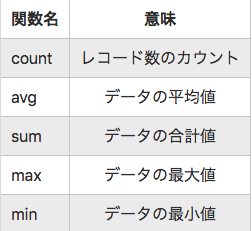

In [ ]:
select count(*) from users; /* usersテーブルのレコード数を数える */
-- 出力結果:6

select avg(age) from users; /* ユーザーの平均年齢を求める */
-- 出力結果:23.5000

select sum(math + japanese) from users where user_name = 'tani'; /* 谷さんの合計点を求める　*/
-- 出力結果:188

select max(math) from users; /* 数学の最高点を求める */
-- 出力結果:90

select min(math) from users;　/* 数学の最低点を求める */
-- 出力結果:39

## GROUP BY
グループ化を行うには、group by句を使用します。  
特定の場所で集約関数を使用したいときに、group by句でその場所を指定します。  
group by句使用時、select句内には、「group by句で指定したカラム名」、「集約関数」、「定数」しか指定できません。  
基本的にはあるカラムでグループ化し、そのグループごとに別のカラムに集約関数を使って利用することが多いです。  
使い方の例は次の通りです。

In [ ]:
/* 性別ごとに国語の平均点を求める */
select sex, avg(japanese) from users group by sex;

In [ ]:
--出力結果　　
+------+---------------+
| sex  | avg(japanese) |
+------+---------------+
|    0 |       75.0000 |
|    1 |       70.0000 |
+------+---------------+

group by は以下のようなイメージです。　　
sexの0,1ごとでグループを作り、そのグループごとでjapaneseの平均を求めています。　　
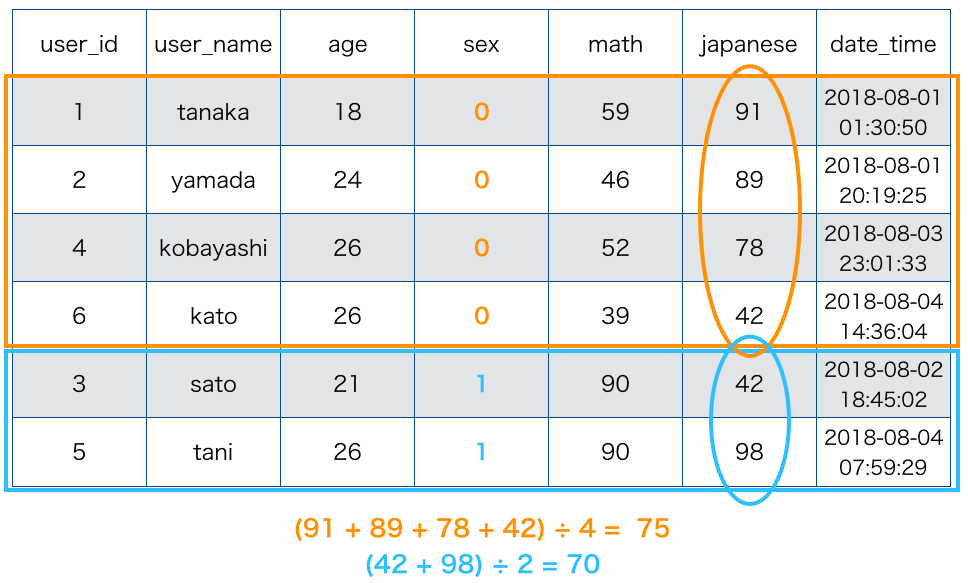

## HAVING
group by句で指定した場所を集約関数で計算したのち、その計算結果に対してwhere句のように条件を指定できるのがhaving句です。  
group by句とセットで使用します。  
使い方の例は次の通りです。

In [ ]:
/*　ユーザーごとの合計点を計算し、合計点が135点以上のユーザー名と得点を表示する */
select user_name, sum(math + japanese) 
from users 
group by user_name 
having sum(math + japanese) >= 135;

In [ ]:
--出力結果
+-----------+----------------------+
| user_name | sum(math + japanese) |
+-----------+----------------------+
| tanaka    |                  150 |
| yamada    |                  135 |
| tani      |                  188 |
+-----------+----------------------+

## ORDER BY
order by句は、selectで取り出したデータの順番を並び替えることができます。  
ascで昇順、descで降順となり、指定しなかった場合は自動的に昇順となります。  
使い方の例は次の通りです。

In [ ]:
*　ユーザーことに合計点を求め、高得点のユーザーから順番に表示する */
select user_name, sum(math + japanese) 
from users 
group by user_name
order by sum(math + japanese) desc;

In [ ]:
--出力結果
+-----------+----------------------+
| user_name | sum(math + japanese) |
+-----------+----------------------+
| tani      |                  188 |
| tanaka    |                  150 |
| yamada    |                  135 |
| sato      |                  132 |
| kobayashi |                  130 |
| kato      |                   81 |
+-----------+----------------------+

## IN
IN演算子を使うことで複数のデータを指定してデータを抽出可能になります。  
構文は以下のようになります。

In [ ]:
SELECT カラム名 FROM テーブル名 WHERE カラム名 IN(値1,値2, ・・・値N);

In [ ]:
select * from users where user_id in (1,3,5);

In [ ]:
--出力結果
+---------+-----------+------+------+------+----------+---------------------+
| user_id | user_name | age  | sex  | math | japanese | date_time           |
+---------+-----------+------+------+------+----------+---------------------+
|       1 | tanaka    |   18 |    0 |   59 |       91 | 2018-08-01 01:30:50 |
|       3 | sato      |   21 |    1 |   90 |       42 | 2018-08-02 18:45:02 |
|       5 | tani      |   26 |    1 |   90 |       98 | 2018-08-04 07:59:29 |
+---------+-----------+------+------+------+----------+---------------------+
3 rows in set (0.01 sec)

また、NOT IN演算子を使うとある値が指定したデータに含まれない値を取得出来ます。

In [ ]:
/* user_idが 1か3か5ではない行を取得 */ 
select * from users where user_id not in (1,3,5);

## LIMIT
limitを使うことで取得するレコード(行)数を制限することができます。  
limit句の後に取得したい件数を記述することで上から順にその件数分だけ取得します。

In [ ]:
select * from users limit 3;

In [ ]:
-- 出力結果
+---------+-----------+------+------+------+----------+---------------------+
| user_id | user_name | age  | sex  | math | japanese | date_time           |
+---------+-----------+------+------+------+----------+---------------------+
|       1 | tanaka    |   18 |    0 |   59 |       91 | 2018-08-01 01:30:50 |
|       2 | yamada    |   24 |    0 |   46 |       89 | 2018-08-01 20:19:25 |
|       3 | sato      |   21 |    1 |   90 |       42 | 2018-08-02 18:45:02 |
+---------+-----------+------+------+------+----------+---------------------+
3 rows in set (0.00 sec)

上位何件まで取得したい際やレコード数が莫大にあるデータベースを扱う時に数件だけ取得してデータを確認する際などに用います。制限せずに全てのカラムの全てのレコードを取得するとかなりの時間がかかる場合もあります。


## date関連
業務において、日付や時間に関するデータを取り扱う機会は非常に多いです。  
以下に、時間・日付関数の代表例を示します。  
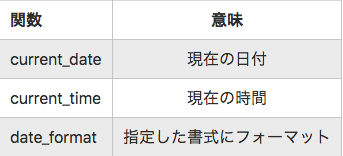

中でもdata_formatは頻繁に使用しますので、usersテーブルを例に詳しく説明します。  
 
usersテーブルにおける8月1日の登録者数をcountで数えるとします。  
このとき、以下のコードの出力は何も返って来ません。  


In [ ]:
/*出力は何も返ってこないコード */
select date_time,count(*) from users where date_time = '2018-08-01' group by date_time;

なぜなら、date_timeカラムのデータはtimestamp型で、秒まで記録されているためです。  
よって、date_formatを用いることで、date_timeカラム内のデータを年・月・日だけの形に変える必要があります。  
 
date_formatを用いたフォーマットはselect句内で実行でき、date_format(カラム名, 変更したい形)のように指定します。  
使い方の例は次の通りです。

In [ ]:
/*date_formatを用いてdate_timeカラムのデータを年・月・日の形にフォーマットしてから日付を指定*/

select date_format(date_time,'%Y-%m-%d'),count(*) 
from users 
where date_format(date_time,'%Y-%m-%d') = '2018-08-01' 
group by date_format(date_time,'%Y-%m-%d');

In [ ]:
--出力結果
+-----------------------------------+----------+
| date_format(date_time,'%Y-%m-%d') | count(*) |
+-----------------------------------+----------+
| 2018-08-01                        |        2 |
+-----------------------------------+----------+

%の後ろに指定する文字は、大文字と小文字を区別するので、この点に注意しましょう。　　
 
Y:4桁の年数  
y:2桁の年数　　
 
詳しくは、以下のMySQLのリファレンスを参照してください。  
https://dev.mysql.com/doc/refman/5.6/ja/date-and-time-functions.html#function_date-format


## betweenとは
betweenは論理演算子の一つです。between演算子は、where句で用いる演算子で値の範囲を指定することができます。  
抽出したい列名の後にbetweenと記述し、下限値 and 上限値 と記述することで下限値以上かつ上限値以下の範囲を指定します。

In [ ]:
select * from tbl_a where col_a between 下限値 and 上限値;

# CASE式とは
CASE式とは、条件分岐を行う構文のことです。  
あくまで式なので select句・where句・group by句・having句など様々な箇所で利用することができます。  
CASE式には単純CASE式と検索CASE式の大きく二つの構文が存在します。

In [ ]:
-- サンプルテーブル
create database sample_db; -- <-必要に応じて変更
use sample_db;

create table users( -- <-必要に応じて変更
    Id int auto_increment not null primary key,
    Sex varchar(255),
    Score int
);

insert into users
(Id,Sex,Score)
values
(1,'female',89),
(2,'male',100),
(3,'female',70),
(4,'female',22);

 select * from users; -- 下記実行結果

/*
+----+--------+-------+
| Id | Sex    | Score |
+----+--------+-------+
|  1 | female |    89 |
|  2 | male   |   100 |
|  3 | female |    70 |
|  4 | female |    22 |
+----+--------+-------+
4 rows in set (0.00 sec)

## 単純CASE式

In [ ]:
CASE '列名'
    WHEN 'A' THEN 'Aと等しい際に返す値'
    WHEN 'B' THEN 'Bと等しい際に返す値'
    ：
    ：
ELSE '条件に当てはまらなかった際に返す値' END

--具体例

SELECT
(CASE Sex
    WHEN 'male' THEN 0
    WHEN 'female' THEN 1
ELSE 2 END) as Sex
from users;

Sex列のデータの中でmaleならば0に、femaleなら1に、その他なら2に変換するという単純CASE式を使った条件分岐です。　　
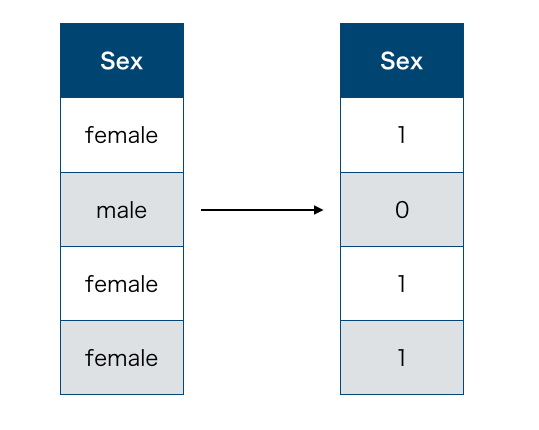



## 検索CASE式 
検索CASE式は単純CASE式と違い、値が等しいかどうかだけでなく、比較などの条件式に沿った処理を行うことができます。  
条件式を満たすとそれに対応して値を返します。  
上からコードが実行されていくので、複数の条件式を満たしている場合でも最も上の条件が優先されて結果が返ってきます。

In [ ]:
CASE
    WHEN '条件式1' THEN '条件式1を満たす際に返す値'
    WHEN '条件式2' THEN '条件式2を満たす際に返す値'
    ：
    ：
ELSE '上記条件を満たさなかった際に返す値' END

--具体例

SELECT
(CASE
    WHEN Score = 100 THEN '満点'
    WHEN Score >= 70 THEN '合格'
ELSE '不合格' END) as Score
FROM users;

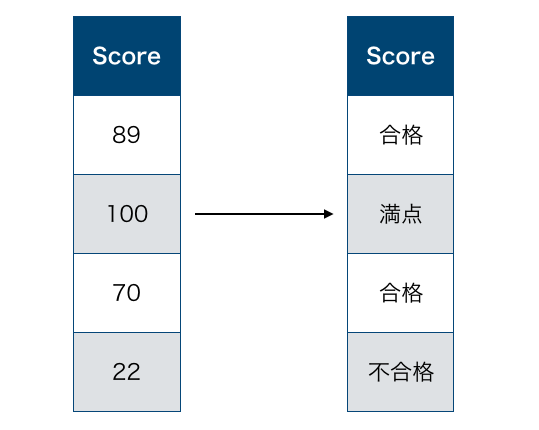

# テーブルの結合  
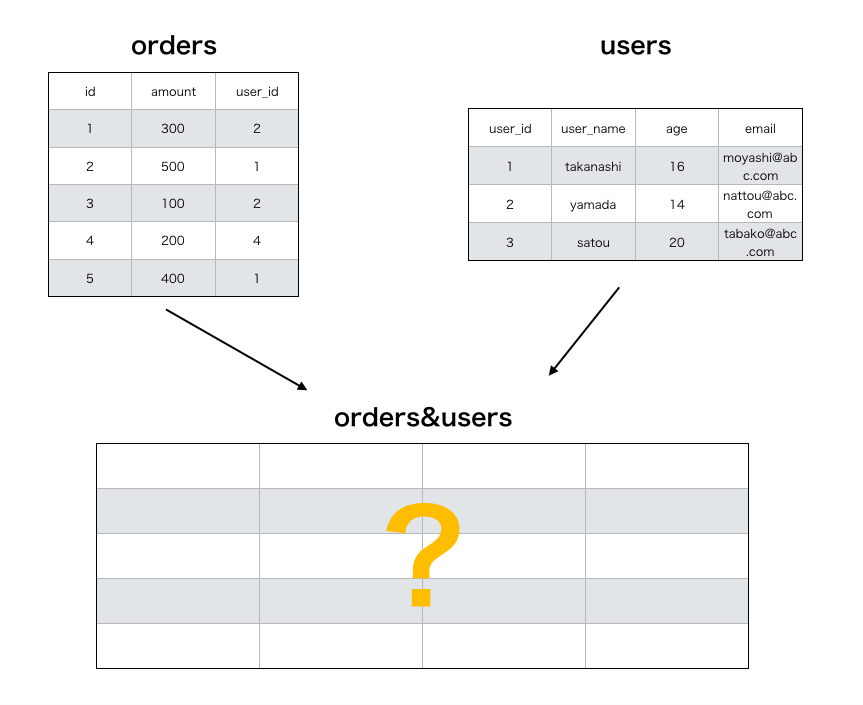

複数のテーブルを結合して一つのテーブルを作るようなイメージです。結合して一つのテーブルとして扱うことで異なるテーブルのそれぞれのデータを簡単に抽出することができます。  
結合は抽出する際の一時的なもので元のテーブルが変わってしまうようなことはありません。  
##内部結合と外部結合
テーブルの結合方法の違いによって、大きく内部結合と外部結合の二種類に分かれています。

## 内部結合(inner join)とは
内部結合は2つのテーブルの結合条件に一致するものだけを結合します。

In [ ]:
select *
from テーブル名1
inner join テーブル名2　-- 結合するテーブルを指定
on テーブル名1.カラム名A = テーブル名2.カラム名B; -- 結合条件

join句では、from句で指定したテーブル名1に結合するテーブル名2を指定しています。  
on句では、結合条件を指定しています。  
テーブル名1のカラム名Aとテーブル名2のカラム名Bが等しいものを結合します。  
前回作成したテーブルを例にあげて内部結合を見ていきます。

In [ ]:
select *
from orders
inner join users
on orders.user_id = users.user_id;

※内部結合inner joinは、省略してjoinと表記することもできます。

In [ ]:
# 出力結果
+----+--------+---------+---------+-----------+------+-----------------+
| id | amount | user_id | user_id | user_name | age  | email           |
+----+--------+---------+---------+-----------+------+-----------------+
|  1 |    300 |       2 |       2 | yamada    |   14 | nattou@abc.com  |
|  2 |    500 |       1 |       1 | takanashi |   16 | moyashi@abc.com |
|  3 |    100 |       2 |       2 | yamada    |   14 | nattou@abc.com  |
|  5 |    400 |       1 |       1 | takanashi |   16 | moyashi@abc.com |
+----+--------+---------+---------+-----------+------+-----------------+
4 rows in set (0.00 sec)

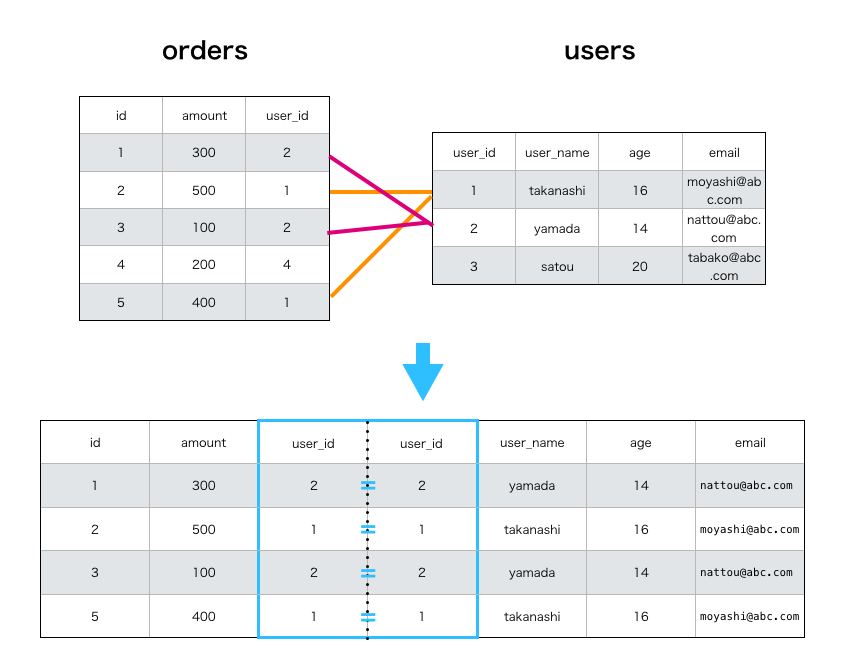

## 外部結合(outer join)とは
内部結合では結合条件と一致したものだけを結合していましたが、外部結合では結合条件と一致したものに加えて、結合する二つのテーブルのどちらか片側のテーブルのレコードを全てを結合します。  
外部結合は、左外部結合(left outer join)と右外部結合(right outer join)の大きく二つに分類されます。  
left outer joinで左側の、right outer joinで右側のテーブルのレコードを全てを結合します。


## 左外部結合(left outer join)
結合条件を満たすものと左側のテーブルのレコードを全て結合させます。  
結合条件を満たさないかつ、左側のテーブルでのみ存在するレコードの右側部分はnull(空)と返ってきます。

In [ ]:
select *
from テーブル名1
left outer join テーブル名2　-- 結合するテーブルを指定
on テーブル名1.カラム名A = テーブル名2.カラム名B; -- 結合条件

In [ ]:
select *
from orders
left outer join users
on orders.user_id = users.user_id;

In [ ]:
# left outer joinの出力結果
+----+--------+---------+---------+-----------+------+-----------------+
| id | amount | user_id | user_id | user_name | age  | email           |
+----+--------+---------+---------+-----------+------+-----------------+
|  1 |    300 |       2 |       2 | yamada    |   14 | nattou@abc.com  |
|  2 |    500 |       1 |       1 | takanashi |   16 | moyashi@abc.com |
|  3 |    100 |       2 |       2 | yamada    |   14 | nattou@abc.com  |
|  4 |    200 |       4 |    NULL | NULL      | NULL | NULL            |
|  5 |    400 |       1 |       1 | takanashi |   16 | moyashi@abc.com |
+----+--------+---------+---------+-----------+------+-----------------+
5 rows in set (0.00 sec)

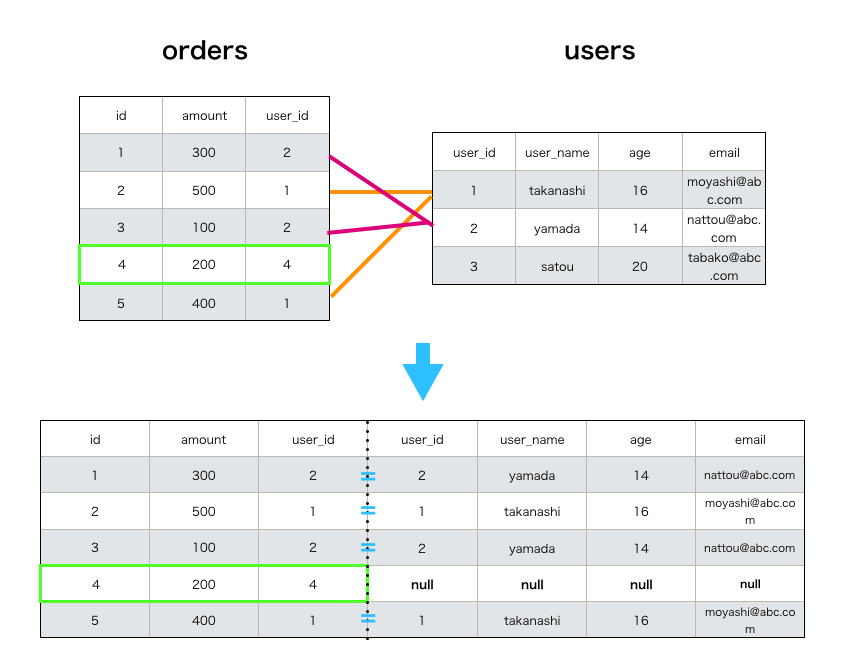  
left outer joinの出力結果を見ると、結合条件と一致しているuser_idの1と2のレコードに加え、左側のテーブルでしか存在しないuser_idが4のレコードが結合されていることが分かります。
user_idが4のレコードが右側のテーブルには存在しないのでその箇所はnullとなります。


## 右外部結合(right outer join)
左外部結合(left outer join)では左側を優先していましたがそれが右側に変わっただけのものです。  
※MySQLではRIGHT OUTER JOIN を利用できますが、SQLiteでは RIGHT OUTER JOIN は利用できませんので注意です。


In [ ]:
select *
from orders
right outer join users
on orders.user_id = users.user_id;

In [ ]:
# right outer join　の出力結果
+------+--------+---------+---------+-----------+------+-----------------+
| id   | amount | user_id | user_id | user_name | age  | email           |
+------+--------+---------+---------+-----------+------+-----------------+
|    1 |    300 |       2 |       2 | yamada    |   14 | nattou@abc.com  |
|    2 |    500 |       1 |       1 | takanashi |   16 | moyashi@abc.com |
|    3 |    100 |       2 |       2 | yamada    |   14 | nattou@abc.com  |
|    5 |    400 |       1 |       1 | takanashi |   16 | moyashi@abc.com |
| NULL |   NULL |    NULL |       3 | satou     |   20 | tabako@abc.com  |
+------+--------+---------+---------+-----------+------+-----------------+
5 rows in set (0.00 sec)

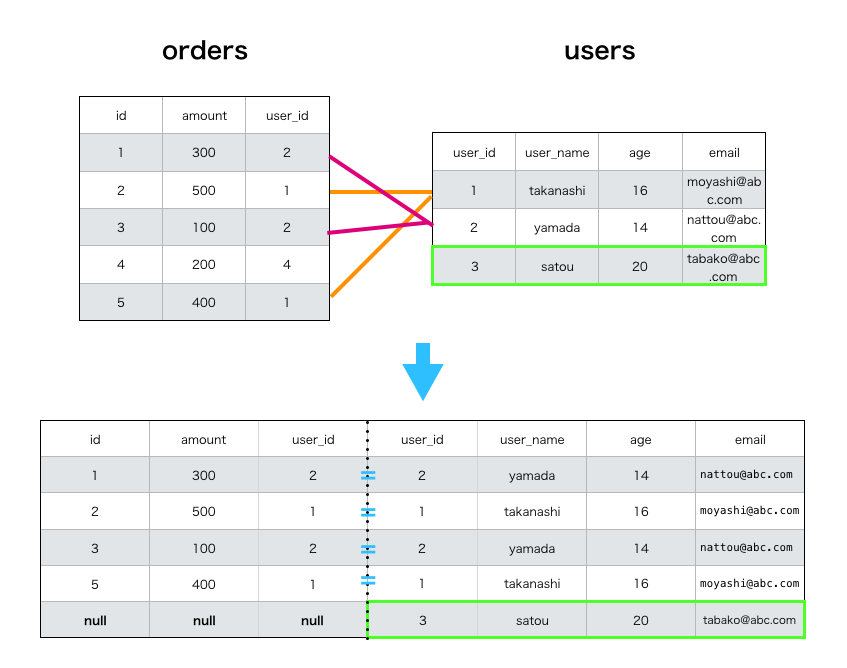  
right outer join の出力結果では逆に、右側のテーブルだけにあるuser_idの3に対応している左側のテーブルの箇所がnullとなります。  
  
※外部結合[left, right] outer joinは省略して[left, right] joinと表記することもできます。

## 内部結合と外部結合の使い方
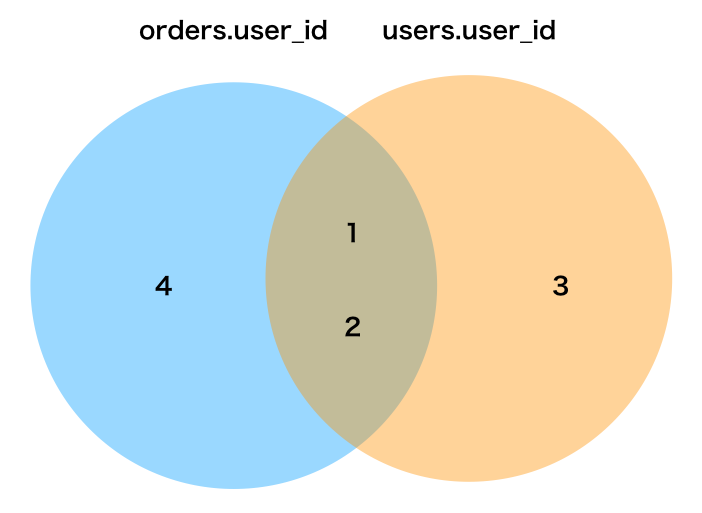

内部結合や外部結合は分かったけど、一体どのように使っていくのか。  
内部結合は二つのテーブルの両方に存在するuser_id[1,2]だけを抽出したい時に使い、外部結合はどちらか片方のテーブル、左なら[1,2,4]のuser_idのデータを抽出したい時に使います。  
また、外部結合により出現する欠損値(null)を利用することで片方のテーブルに存在しないuser_id[3]を抽出することができます。


# サブクエリとは
**サブクエリとは、副問い合わせとも言い、select文で取得した結果を別のselect文などで利用する事ができるものです。**サブクエリはselect句・from句・where句・having句など様々な箇所で使用する事が可能です。また、select文以外にもupdate文、delete文、insert文などでも使用できます。  
<font color="Crimson">**サブクエリの特徴として、情報を取得するための、一時テーブルを生成することが出来ます。（一時生成されたテーブルは処理が終わったら破棄されます。）**</font>
## 構文


In [ ]:
select 列名 from テーブル名
where 列名 演算子 (select 列名 from テーブル名);

これはselect文のwhere句にサブクエリを用いた一例です。  
()で囲まれたサブクエリの結果を用いてメインクエリのwhere句で比較を行なっています。
## 具体例
ここでは具体例を用いてサブクエリがどういったものかを学びます。

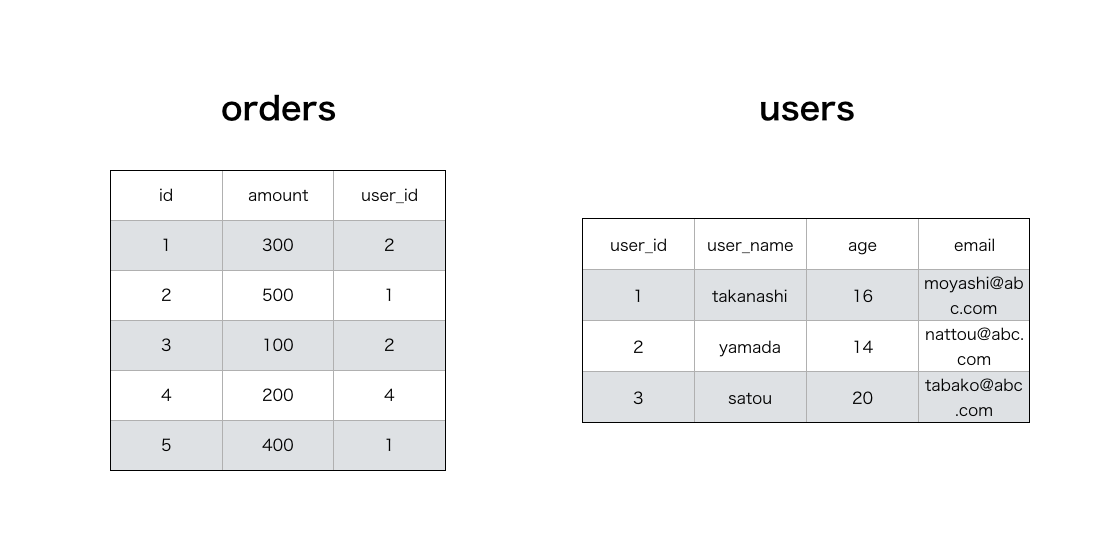

In [ ]:
select
    user_id, amount
from
    orders
where
    user_id = (
        select max(user_id) from orders);

サブクエリで最も大きなuser_id(=4)を取得し、メインクエリのwhere句でその結果がuser_idと等しいという条件を満たす、全ての行のuser_idとamountを抽出しています。

In [ ]:
+---------+--------+
| user_id | amount |
+---------+--------+
|       4 |    200 |
+---------+--------+
1 row in set (0.00 sec)

## サブクエリを用いた一時テーブル作成
サブクエリを用いると、情報を取得するための、一時テーブルを生成することが出来ます。
（一時生成されたテーブルは処理が終わったら破棄されます。）
 
手順は以下の通りです。
 
1.  FROM句でサブクエリを生成
2.生成時のSELECT文は（）で囲む。この時に必ず「AS」でサブクエリ名を付ける
（後ほどのデータ取得の際にその名前がカラムとなるため）
3.作成したサブクエリを元に最初のSELECT文が実行
 
例えば次のようなコードが書けます。

In [ ]:
select サブクエリ名
from (select フィールド AS サブクエリ
      from　テーブル1 as A
      join テーブル2 as B
      on A.ID = B.ID
      group by A.ID
      having サブクエリ >= 40);

## WITH句とは
WITH句は共通テーブル式やCTE(Common Table Expression)と呼ばれる記述方法です。  
WITH句を使うことによって、サブクエリに名前をつけて一時的なテーブルのように扱い、再度利用することができます。  
また、単純にサブクエリで記述した際と比較し、可読性を大きく上げることができます。  
サブクエリについてはこちらのテキストをご参考ください。   
WITH句は以下のように記述します。

In [ ]:
with "テーブル名" as (<select文>)

仮のテーブルにしたいものをasの後ろにselect文で抽出し、asの前でテーブル名をつけます。  
基本的なWITH句の構文はこれだけです。サブクエリと違い、この作ったテーブルを繰り返し使い回すことができます。  
with句を使った具体例を見ていきましょう

In [ ]:
-- WITH句で一時的なテーブルを作成
with sub_tbl as (select * from tbl_a)
-- 作ったテーブルを利用して抽出
select * from sub_tbl;

## WITH句とサブクエリの比較
まずはWITH句を使ったものを見ていきます。

In [ ]:
with sub_tbl1 as ( 
    　　　　　　　select * from tbl_a),
    　　　sub_tbl2 as (
        　　select *　from tbl_b),
    　　　sub_tbl3 as (
    　　　　　　　select * from sub_tbl1 join sub_tbl2 on sub_tbl1.col_a=sub_tbl2.col_a)

select * from sub_tbl3;

In [ ]:
# WITH句を使わないサブクエリ
select * 
from  (select *
         from (select * 
                from tbl_a) as sub_tbl1
         join (select *
               from tbl_b) as sub_tbl2
         on sub_a.col_a = sub_b.col_b) as sub_tbl3;

# VIEWとは
VIEWは、抽出してきたデータを仮装的なテーブルとして扱うことができるものです。  
VIEWを使うことで、頻繁に使うデータの抽出をテーブルのようなものとして保存することができ、そのVIEWから抽出することで、繰り返し同じようなクエリを書く手間を短縮することができます。  
※VIEWはデータそのものを保存しているのではなく、保存したいデータのselect文を保存しています。

## VIEWの作り方

In [ ]:
create view 'ビュー名' ('ビューの列名1','ビューの列名2',...)
as 
select * from 'テーブル';

## VIEWの使い方

In [ ]:
select * from 'ビュー名';

## VIEWの削除

In [ ]:
drop view 'ビュー名';

## 具体例
こちらのテキストで使ったテーブルを用いてVIEWを使っていきます。  
usersテーブルとordersテーブルを内部結合し、user_idごとのamountの合計を抽出するクエリをVIEWにしてみよう。  
create viewによって作成されたusers_amount_sum viewには、user_id,user_name,amountのカラムを持ち合わせてるという意味になります。  

In [ ]:
-- VIEWの作成
-- users_amount_sum viewには、user_id,user_name,amountのカラムを持ち合わせてるという意味
create view users_amount_sum(user_id,user_name,amount)
as
select users.user_id,users.user_name,sum(orders.amount)
from users
join orders
on orders.user_id = users.user_id
group by users.user_id;

VIEWにしたいデータをselect文で指定します。  
select文の上にcreate viewとし、ビュー名とビューの列名を決めます。

In [ ]:
-- 出力結果
Query OK, 0 rows affected (0.00 sec)

In [ ]:
-- viewの使用
select * from users_amount_sum;

In [ ]:
-- 出力結果
+---------+-----------+--------+
| user_id | user_name | amount |
+---------+-----------+--------+
|       2 | yamada    |    400 |
|       1 | takanashi |    900 |
+---------+-----------+--------+
2 rows in set (0.00 sec)

In [ ]:
-- VIEWの削除
drop view user_amount_sum;

VIEWを使うことで、頻繁に抽出するデータを繰り返しテーブルのように使うことができ、データの抽出の理解を助けることができます。  
頻繁に使うクエリや複雑なクエリなどはVIEWにしておくのもいいかもしれません。

# PythonからMySQLを利用する

## はじめに
このテキストでは、以下のモジュールを紹介します。  
①  mysqlclient  
②  mysql-connector-python-rf  
③  PyMySQL  
加えて、どのモジュールがどのように使われるかも説明致します。  
pythonからmysqlを利用する場合、Webアプリケーション開発を作成する際に利用するケースが比較的多いです。  
理由は、多くのWebサービスは何かしらのデータを保存しており、その保存先としてデータベースが挙げられます。  
他にもWebスクレイピングで抽出したデータを保存する用途としても用いられます。  
ですが、上記以外の用途として、手元のCSVやExcelデータを読み込み、一部のデータをデータベースにデータを移管する際など様々なシーンで活用されます。  
ですが、ここで紹介する3つのモジュールは書き方やインストール方法が若干違えど、出来ることはほぼ同じですので、自分の使いやすいモジュールや業務で既に使われているモジュールがあれば該当するモジュールを利用してください。

## mysqlclientでPython+MySQLを接続する
PythonとMySQLを使い、PythonからMySQLを接続する方法を学んでいきましょう。  
今回「mysqlclient」を利用します。  
下記方法でインストールしてください。



In [ ]:
pip install mysqlclient

インストールできましたら、次に下記プログラムを任意のファイル名で保存してください。  
(Jupyter Notebookをお使いの方は、Notebookに記述してください)

In [ ]:
import MySQLdb

# 注意
# 下記変数userとpasswdとdbの３つはお使いの環境にあった内容を代入してください。
connect = MySQLdb.connect(
    user="test", # 何も設定していない場合、testをrootに変更してください。
    passwd="test_user", # パスワードを設定していない場合、test_userを設定したパスワードに変更してください。
    host="localhost",
    db="test_db",　# 接続したいデータベース（test_dbを作成していない場合は、新規にtest_dbデータベースを作成してください。）
    charset="utf8"
)
cursor = connect.cursor() # カーソルの取得

# テーブルの作成
"""
Cursorクラスのexecute()によりSQLの実行が可能です。
"""
cursor.execute("create table users (user_id int(20), user_name varchar(45), email varchar(45))")
connect.commit()

# 作成したテーブルにデータを保存する
cursor.execute("insert into users values(%s, %s, %s)", (1, "ai_academy", "aiacademy@cyberbra.in"))
connect.commit()

# 接続を閉じる
connect.close()

## mysql-connector-python-rfでPython+MySQLを接続する
MySQL 公式のmysql-connector-python-rf というパッケージを使用したpython + MySQLの接続方法です。  

次のコマンドでインストールしましょう。



In [ ]:
pip install mysql-connector-python-rf 

上記方法でインストールできない場合は下記の方法でインストールを試してみてください。



In [ ]:
pip install mysql-connector-python

インストールできましたら、次に下記プログラムを任意のファイル名で保存してください。  
(Jupyter Notebookをお使いの方は、Notebookに記述してください)

1
